In [11]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import arange, conj, prod 
import scipy.sparse as sp

cy_ode_psi_func_td


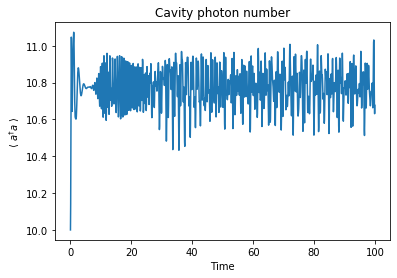

In [83]:
N = 60

#reminder: basis(5,0) is the higehst state of 5, basis(5,4) is the lowest state of 5. 

sigma11 = tensor(qeye(N), basis(5,0) * basis(5,0).dag()) # deletes state, unless acting on level 5 (highest)
sigma22 = tensor(qeye(N), basis(5,1) * basis(5,1).dag()) # deletes state, unless acting on level 4
sigma33 = tensor(qeye(N), basis(5,2) * basis(5,2).dag()) # deletes state, unless acting on level 3
sigma44 = tensor(qeye(N), basis(5,3) * basis(5,3).dag()) # deletes state, unless acting on level 2
sigma55 = tensor(qeye(N), basis(5,4) * basis(5,4).dag()) # deletes state, unless acting on leve 1 (lowest)

sigma12=tensor(qeye(N),basis(5,0)*basis(5,1).dag()) # raising from 4 to 5
sigma13=tensor(qeye(N),basis(5,0)*basis(5,2).dag()) # raising form 3 to 5
sigma15=tensor(qeye(N),basis(5,0)*basis(5,4).dag()) # raising from 2 to 5
sigma34=tensor(qeye(N),basis(5,2)*basis(5,3).dag()) # raising form 2 to 3
I = tensor(qeye(N), qeye(4)) # cavity has 60 dimensions, atom has 4 possible transitions

#The detuning parameters 
delta1 = 0.0
delta2 = 0.0
delta3 = 0.0
delta4 = 0.0

# cavity operators
a = tensor(destroy(N), qeye(5)) # cavity has 60 dimensions, atom has 5 dimensions

# coupling constants
lambd1 = 1.0 
lambd2 = 1.0 
lambd3 = 1.0 
lambd4 = 1.0

def hamiltonian_t(t, args):
    H0  = args[0]
    H12 = args[1]
    H21 = args[2]
    H13 = args[3]
    H31 = args[4]
    H15 = args[5]
    H51 = args[6]
    H34 = args[7]
    H43 = args[8]
    H=H0+(H12+H21)+(H13+H31)+(H34+H43)+(H15+H51)
    return H

H0 = delta1*sigma22 + delta2*sigma33 + (delta3+delta2)*sigma44 + delta4*sigma55 #zero for zero detuning
H12= lambd1 * a * sigma12
H21= lambd1 * a.dag() * sigma12.dag()
H13= lambd2 * a * sigma13
H31= lambd2 * a.dag() * sigma13.dag()
H15= lambd3 * a * sigma15
H51= lambd3 * a.dag() * sigma15.dag()
H34= lambd4 * a * sigma34
H43= lambd4 * a.dag() * sigma34.dag()
H=H0+(H12+H21)+(H13+H31)+(H34+H43)+(H15+H51)
       
c_ops = []
psi0 = tensor(coherent(N, sqrt(10)), (basis(5,0)).unit()) # 60 fock states, eigenvalue of sqrt(10), atom begins in ground state

tlist = linspace(0, 100, 1500)
res = mesolve(hamiltonian_t, psi0, tlist, c_ops,[a.dag()*a],args)
adaga = res.expect[0]


# visualization
plt.figure(1)
plt.plot(tlist, adaga)
plt.title('Cavity photon number')
plt.xlabel('Time')
plt.ylabel('⟨ ${a^\dag}a$ ⟩')
#plt.legend(fontsize = label_size)

plt.show()






In [74]:
H0 = delta1*sigma22 + delta2*sigma33 + (delta3+delta2)*sigma44 + delta4*sigma55
H12= lambd1 * a * sigma12
H21= lambd1 * a.dag() * sigma12.dag()
H13= lambd2 * a * sigma13
H31= lambd2 * a.dag() * sigma13.dag()
H15= lambd3 * a * sigma15
H51= lambd3 * a.dag() * sigma15.dag()
H34= lambd4 * a * sigma34
H43= lambd4 * a.dag() * sigma34.dag()
H=H0+(H12+H21)+(H13+H31)+(H34+H43)+(H15+H51)

Quantum object: dims = [[60, 5], [60, 5]], shape = (300, 300), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [88]:
(basis(5,0)*basis(5,1).dag()) * basis(5,1)
basis(5,0)


Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [23]:
# The atom is initially prepared in coherent state
def CS(N, alpha, offset=0, method='operator'):
    x = basis(N, 0)
    a = destroy(N)
    D = (alpha * a.dag() - conj(alpha) * a).expm() 
    return D * x


# The atom is initially prepared in squeezed state
def squeezed_state(N, alpha ,r, theta):
    x = basis(N,0)
    a=destroy(N)
    zeta=r*exp(1j*theta)
    D=(alpha * a.dag() - cong(alpha) * a).expm() * ((1/2)*((zeta * a.dag()**2 - conj(zeta) * a**2))).expm() 
    return D*x

       
def Mean_photon(level_n, states):
    a= tensor(destroy(N), qeye(level_n)) 
    nc = a.dag() * a
    NC1 = expect(nc, states)
    return NC1


# The second-order correlation function for N level atom 
def Second_order(level_n, states):
    a= tensor(destroy(N), qeye(level_n)) 
    ncc= (a.dag() * a)**2
    nc= a.dag()*a
    NC1 = expect(nc, states)
    NCC1 = expect(ncc, states) 
    Gt=(NCC1-NC1)/NC1**2 
    return Gt
       

# The Mandel Q function for N level atom
def Mandel(level_n, states):
    a= tensor(destroy(N), qeye(level_n)) 
    ncc= a.dag()**2*a**2
    nc = a.dag() * a
    NC1 = expect(nc, states) 
    NCC1 = expect(ncc, states) 
    Q=(NCC1-NC1**2)/NC1 
    return Q
       
def Normal_Sqx(level_n, states):
    a= tensor(destroy(N), qeye(level_n))
    nc = a.dag() * a
    nf = a + a.dag()
    aa = a**2
    ad = a.dag()**2
    aae= expect(aa, states)
    ade= expect(ad, states)
    nfe= expect(nf, states)
    NC1 = expect(nc, states)
    Sx = 0.25*(2*NC1+ aae+ ade+ 1- (nfe)**2)-0.25 
    return Sx
       
def Normal_Sqy(level_n, states):
    a= tensor(destroy(N), qeye(level_n)) 
    nc = a.dag() * a
    nf = a - a.dag()
    aa = a**2
    ad = a.dag()**2
    aae= expect(aa, states)
    ade= expect(ad, states)
    nfe= expect(nf, states)
    NC1 = expect(nc, states)
    Sy = 2*NC1- aae- ade + (nfe)**2 
    return Sy
       

entropy = zeros(shape(tlist))
entropy_cavity = zeros(shape(tlist))
       
def entropy_linear(rho):
    if rho.type == 'ket' or rho.type == 'bra': 
       rho = ket2dm(rho)
    return float(real(1.0 - (rho ** 2).tr()))

for idx, rho in enumerate(res.states): 
    entropy_cavity = ptrace(rho, 0) 
    entropy[idx]= entropy_linear(entropy_cavity)
       

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: DeprecationWarning: scipy.conj is deprecated and will be removed in SciPy 2.0.0, use numpy.conj instead


cy_ode_psi_func_td


In [10]:
basis(2,0) * basis(2,0).dag()
sigmam()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]